In [80]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data and first look

In [81]:
data = pd.read_csv("insurance.csv")
df = data.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [82]:
data.shape

(1338, 7)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [84]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [85]:
# double checking for any missing values

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exploratory Data Analysis

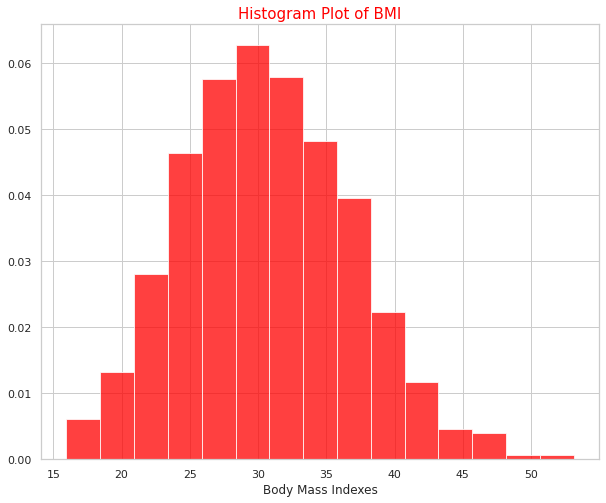

In [86]:
# histogram plot of bmi // matplotlib

fig = plt.figure(figsize=(10,8))

plt.hist(data['bmi'], bins=15, color="red", density=True, alpha=0.75)
plt.title("Histogram Plot of BMI", color="red", fontdict= {"fontsize":15})
plt.xlabel("Body Mass Indexes")

plt.show()

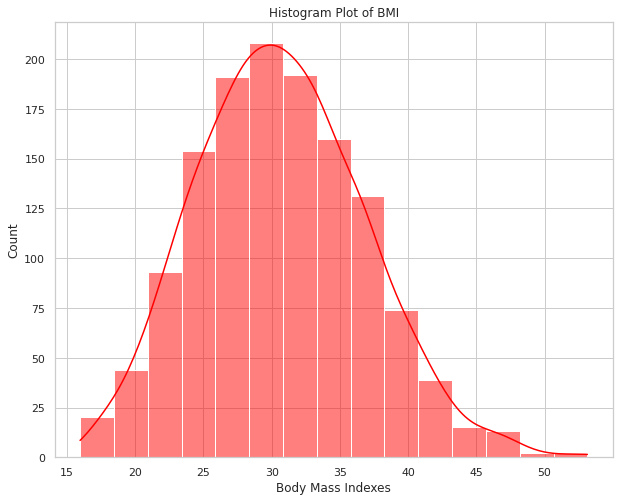

In [87]:
# histogram plot of bmi with kde // seaborn

fig = plt.figure(figsize=(10,8))
sns.histplot(data=df, x="bmi", bins=15, kde=True, color="red").set(title="Histogram Plot of BMI", xlabel="Body Mass Indexes")

plt.show()

In [88]:
# checking the general statistics of bmi
df["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [89]:
# Function for detecting outliers

def detect_outliers(df):
  """
  This function detects outliers while using IQR method.
  """

  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  iqr = q3 - q1
  outliers = df[((df < (q1-1.5*iqr)) | (df > (q3+1.5*iqr)))]
  return outliers


In [90]:
# Number of outliers, minimum and maximum values from outliers are calculated for bmi feature

bmi_outliers = detect_outliers(df["bmi"])
print(f"number of outliers: {len(bmi_outliers)}")
print(f"max outlier value: {max(bmi_outliers)}")
print(f"min outlier value: {min(bmi_outliers)}")



number of outliers: 9
max outlier value: 53.13
min outlier value: 47.41




*   BMI dataset looks normally distributed on graphs.
*   Mean and median for BMI look almost similar.
*   There are 9 outliers in BMI dataset, however due to similarity of mean and median; we can keep that outliers in our dataset.



               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


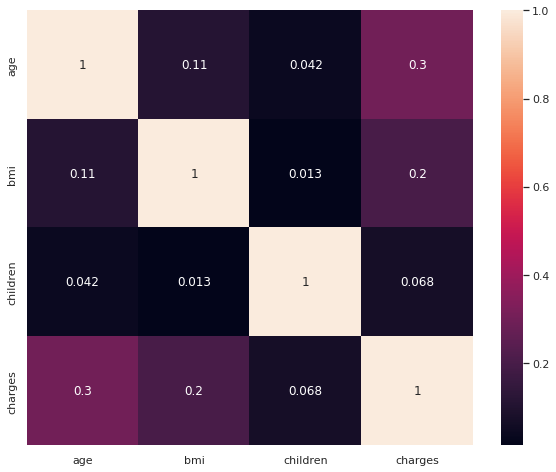

In [91]:
# Correlations and heatmap in dataset

corr_df = df.corr()
print(corr_df)

fig = plt.figure(figsize=(10,8))
sns.heatmap(corr_df, annot=True)
plt.show()

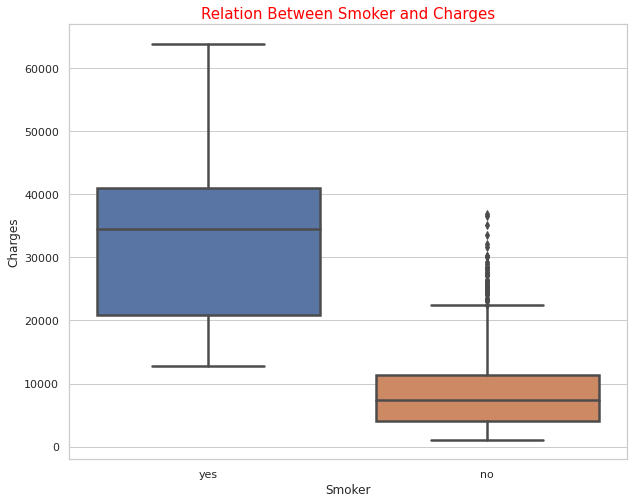

In [92]:
# Boxplot of Smoker and Charges
# For non smokers there are outliers
# It seems in average, smokers are charged higher than non-smokers

fig = plt.figure(figsize=(10,8))

sns.boxplot(y="charges",x="smoker", data=df, linewidth=2.5)
plt.title("Relation Between Smoker and Charges", color="red", fontdict= {"fontsize":15})
plt.xlabel("Smoker")
plt.ylabel("Charges")
sns.set_theme(style="whitegrid")
plt.show()

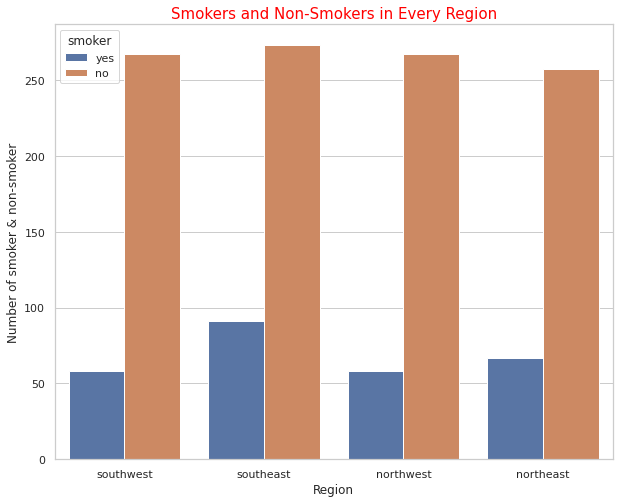

In [93]:
# Countplot of Smokers/Non-Smokers in every region
# It seems for every region number of non smoker is greater than number of smoker

fig = plt.figure(figsize=(10,8))

sns.countplot(x="region", hue="smoker", data=df)
plt.title("Smokers and Non-Smokers in Every Region", color="red", fontdict={"fontsize":15})
plt.xlabel("Region")
plt.ylabel("Number of smoker & non-smoker")
plt.show()

In [94]:
# Numbers for smoker/non-smoker in every region

df.groupby("region")["smoker"].value_counts(ascending=True)

region     smoker
northeast  yes        67
           no        257
northwest  yes        58
           no        267
southeast  yes        91
           no        273
southwest  yes        58
           no        267
Name: smoker, dtype: int64

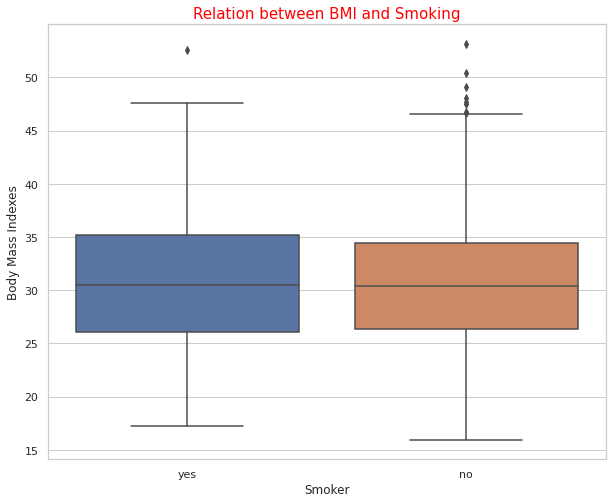

In [95]:
# Boxplot of BMI and Smoking Habit
# It seems there is not much a difference in BMI due to smoking habit, however there are more outliers for non-smokers

fig = plt.figure(figsize=(10,8))

sns.boxplot(x="smoker", y="bmi", data=df)
plt.title("Relation between BMI and Smoking", color="red", fontdict={"fontsize":15})
plt.xlabel("Smoker")
plt.ylabel("Body Mass Indexes")
sns.set_theme(style="whitegrid")
plt.show()

In [96]:
# Average BMI's for smokers and non-smokers and seems no difference between them

df.groupby("smoker")["bmi"].mean()

smoker
no     30.651795
yes    30.708449
Name: bmi, dtype: float64

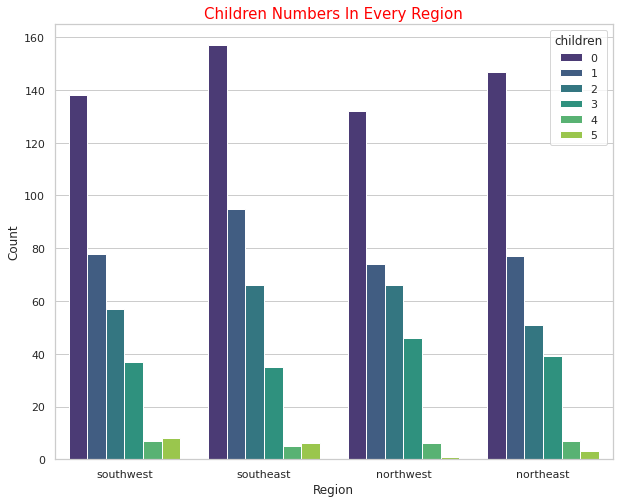

In [97]:
# Count plot of children numbers in every region
# The distribution seems similiar for every region

fig = plt.figure(figsize=(10,8))

sns.countplot(x="region", data=df, hue="children", palette="viridis")
plt.title("Children Numbers In Every Region", color="red", fontdict={"fontsize":15})
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

In [98]:
# Total childrens for every region
# It seems southeast has the biggest population of children

df.groupby("region")["children"].sum()

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

In [99]:
# Correlation between age and bmi

corr_df = df.corr()
corr_age_bmi = corr_df.loc["age", "bmi"]
print(f"Correlation between age and bmi is {corr_age_bmi}")

Correlation between age and bmi is 0.1092718815485351


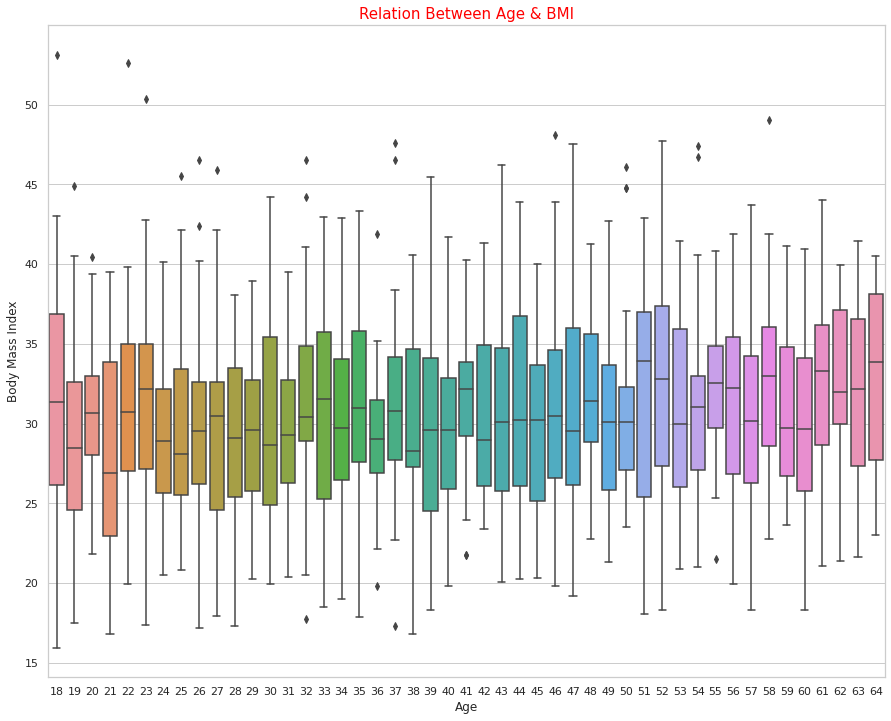

In [100]:
# Boxplot of age and bmi

fig = plt.figure(figsize=(15,12))

sns.boxplot(x="age", y="bmi", data=df)
plt.title("Relation Between Age & BMI", color="red", fontdict={"fontsize":15})
plt.xlabel("Age")
plt.ylabel("Body Mass Index")
plt.show()

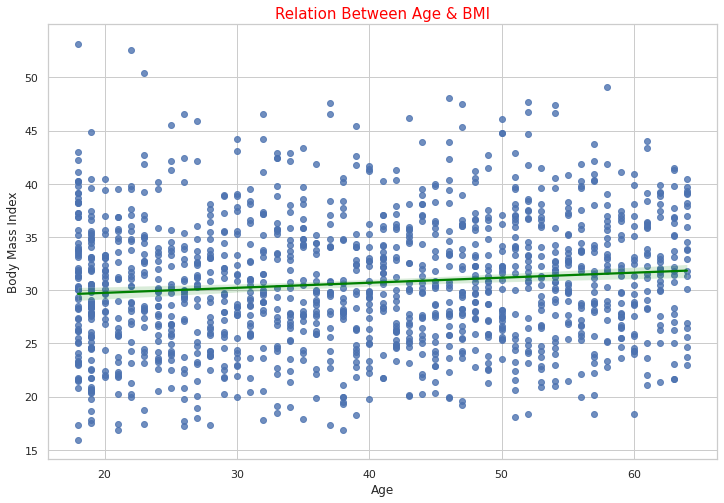

In [101]:
# Regplot of age and bmi

fig = plt.figure(figsize=(12,8))

sns.regplot(x="age", y="bmi", data=df, line_kws={"color":"green"})
plt.title("Relation Between Age & BMI", color="red", fontdict={"fontsize":15})
plt.xlabel("Age")
plt.ylabel("Body Mass Index")
plt.show()

In [102]:
# Average BMI's for every age
# It seems there is no meaningfull relation between age and bmi

df.groupby("age")["bmi"].mean()

age
18    31.326159
19    28.596912
20    30.632759
21    28.185714
22    31.087679
23    31.454464
24    29.142679
25    29.693929
26    29.428929
27    29.333571
28    29.482143
29    29.383148
30    30.557593
31    29.918333
32    31.597692
33    31.163077
34    30.274038
35    31.394800
36    29.374200
37    31.216600
38    28.996600
39    29.910200
40    30.139074
41    31.506852
42    30.328148
43    30.204444
44    30.844259
45    29.778966
46    31.340862
47    30.664310
48    31.925690
49    30.313929
50    31.132241
51    31.727069
52    32.936034
53    30.360893
54    31.234286
55    31.950000
56    31.600962
57    30.844423
58    32.718200
59    30.572000
60    30.332826
61    32.548261
62    32.342609
63    31.923478
64    32.976136
Name: bmi, dtype: float64

In [103]:
# Correlation between bmi and children

corr_bmi_children = corr_df.loc["bmi", "children"]
print(f"Correlation between children and bmi is {corr_bmi_children}")

Correlation between children and bmi is 0.012758900820673994


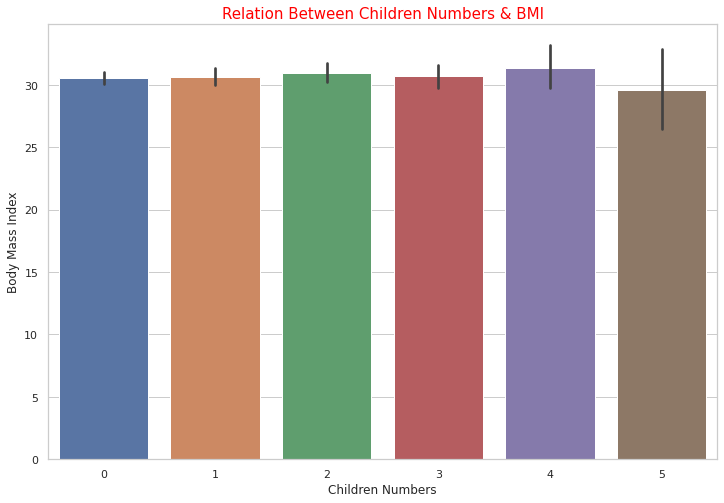

In [104]:
# Barplot of children numbers and bmi
# It seems there is no meaningfull relation between children numbers and bmi

fig = plt.figure(figsize=(12,8))

sns.barplot(x="children", y="bmi", data=df)
plt.title("Relation Between Children Numbers & BMI", color="red", fontdict={"fontsize":15})
plt.xlabel("Children Numbers")
plt.ylabel("Body Mass Index")
plt.show()

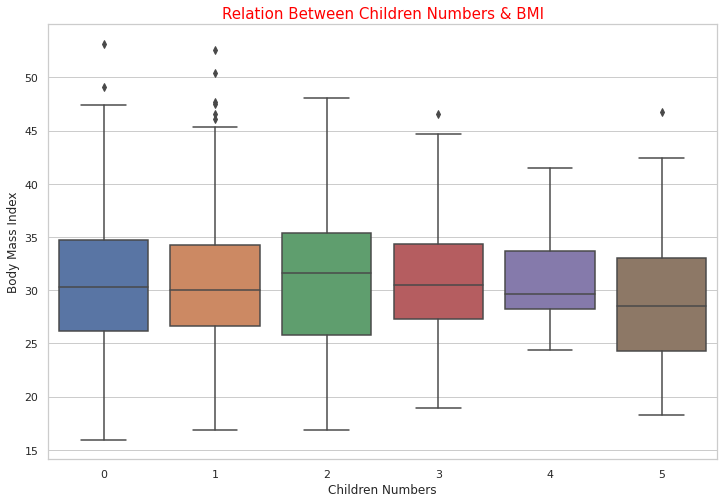

In [105]:
# Boxplot of children numbers and bmi

fig = plt.figure(figsize=(12,8))

sns.boxplot(x="children", y="bmi", data=df)
plt.title("Relation Between Children Numbers & BMI", color="red", fontdict={"fontsize":15})
plt.xlabel("Children Numbers")
plt.ylabel("Body Mass Index")
plt.show()

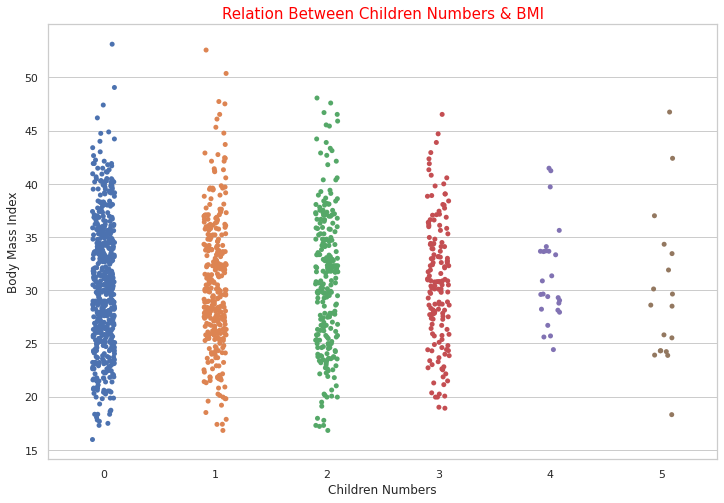

In [106]:
# Stripplot of children numbers and bmi

fig = plt.figure(figsize=(12,8))

sns.stripplot(x="children", y="bmi", data=df)
plt.title("Relation Between Children Numbers & BMI", color="red", fontdict={"fontsize":15})
plt.xlabel("Children Numbers")
plt.ylabel("Body Mass Index")
plt.show()

In [107]:
# Average BMI's for children group

df.groupby("children")["bmi"].mean()

children
0    30.550296
1    30.623148
2    30.978104
3    30.684331
4    31.391200
5    29.605000
Name: bmi, dtype: float64

In [108]:
# Correlation between charges and bmi

corr_bmi_charges = corr_df.loc["bmi", "charges"]
print(f"Correlation between charges and bmi is {corr_bmi_charges}")

Correlation between charges and bmi is 0.19834096883362912


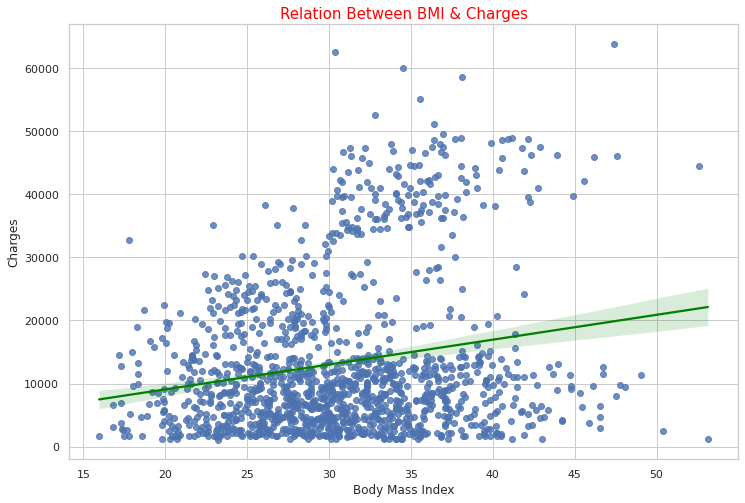

In [109]:
# Regplot of BMI and Charges

fig = plt.figure(figsize=(12,8))

sns.regplot(x="bmi", y="charges", data=df, line_kws={"color":"green"})
plt.title("Relation Between BMI & Charges", color="red", fontdict={"fontsize":15})
plt.xlabel("Body Mass Index")
plt.ylabel("Charges")
plt.show()

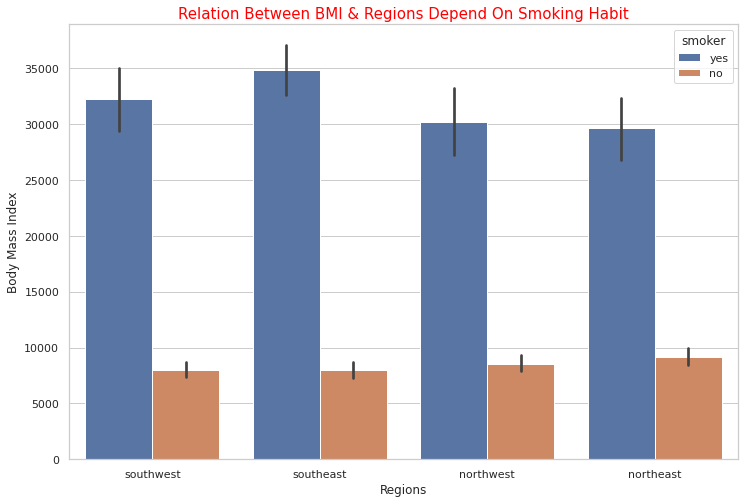

In [110]:
# Barplot of BMI and Regions depend on smoking 

fig = plt.figure(figsize=(12,8))

sns.barplot(x="region", y="charges", data=df, hue="smoker")
plt.title("Relation Between BMI & Regions Depend On Smoking Habit", color="red", fontdict={"fontsize":15})
plt.xlabel("Regions")
plt.ylabel("Body Mass Index")
plt.show()

## Data Preprocessing

In [111]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [112]:
# For binary categorical columns, Label Encoding is applied.

binary_columns = ["sex", "smoker"]
le = LabelEncoder()

for feat in binary_columns:
  df[feat] = le.fit_transform(df[feat])

In [113]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [114]:
# For multinary categorical column, One Hot Encoding is applied.

df = pd.get_dummies(df, columns=["region"])

In [115]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [116]:
# Due to outliers MinMaxScaler is applied.

scaler = MinMaxScaler()
df["bmi"] = scaler.fit_transform(df["bmi"].values.reshape(-1,1))

In [117]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,0.321227,0,1,16884.92400,0,0,0,1
1,18,1,0.479150,1,0,1725.55230,0,0,1,0
2,28,1,0.458434,3,0,4449.46200,0,0,1,0
3,33,1,0.181464,0,0,21984.47061,0,1,0,0
4,32,1,0.347592,0,0,3866.85520,0,1,0,0


In [118]:
# Dependent and independent variables are splitted.

X = df.drop("charges", axis=1)
y = df.loc[:,"charges"]

In [119]:
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,0.321227,0,1,0,0,0,1
1,18,1,0.479150,1,0,0,0,1,0
2,28,1,0.458434,3,0,0,0,1,0
3,33,1,0.181464,0,0,0,1,0,0
4,32,1,0.347592,0,0,0,1,0,0


In [120]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [121]:
# Train and test datasets are splitted.

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

## Model Selection

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score

In [123]:
lin_reg = LinearRegression()
ada_reg = AdaBoostRegressor()
random_forest = RandomForestRegressor()
ridge_reg = Ridge()
lasso_reg = Lasso()
dec_tree_reg = DecisionTreeRegressor()

In [124]:
def score_display(scores):
  """
  This function calculates Root Mean Score Errors, their mean's, and their standard deviation's.
  """
  scores = np.sqrt(-scores)
  print(f"""
  RMSE Scores: {scores},
  Mean: {scores.mean()},
  Standard Deviation: {scores.std()}
  """)

In [125]:
lin_reg_scores = cross_val_score(lin_reg,
                                 X_train, y_train,
                                 scoring = "neg_mean_squared_error",
                                 cv=10)

In [126]:
ada_reg_scores = cross_val_score(ada_reg,
                                 X_train, y_train,
                                 scoring = "neg_mean_squared_error",
                                 cv=10)

In [127]:
random_forest_scores = cross_val_score(random_forest,
                                 X_train, y_train,
                                 scoring = "neg_mean_squared_error",
                                 cv=10)

In [128]:
ridge_reg_scores = cross_val_score(ridge_reg,
                                 X_train, y_train,
                                 scoring = "neg_mean_squared_error",
                                 cv=10)

In [129]:
lasso_reg_scores = cross_val_score(lasso_reg,
                                 X_train, y_train,
                                 scoring = "neg_mean_squared_error",
                                 cv=10)

In [130]:
dec_tree_reg_scores = cross_val_score(dec_tree_reg,
                                      X_train, y_train,
                                      scoring = "neg_mean_squared_error",
                                      cv=10)

In [131]:
score_display(lin_reg_scores)


  RMSE Scores: [6073.99997254 6580.87166754 5233.82683473 6045.25239632 5836.4647871
 6127.43525895 7281.08373608 6321.52706355 6193.3145481  5637.06299714],
  Mean: 6133.083926205501,
  Standard Deviation: 520.7183652979132
  


In [132]:
score_display(ada_reg_scores)


  RMSE Scores: [5187.64906661 5200.00858115 5112.0556758  5386.11403579 5734.62255242
 5098.09321689 5647.01691853 5238.17111774 5663.22676022 5340.14979454],
  Mean: 5360.710771970484,
  Standard Deviation: 227.14622686856742
  


In [133]:
score_display(random_forest_scores)


  RMSE Scores: [4833.11670921 5288.71527371 3837.03365019 4467.48188778 5202.36760196
 4934.88650143 5563.1995009  5383.1607034  5145.46924176 4755.80554226],
  Mean: 4941.123661258737,
  Standard Deviation: 479.8540434314707
  


In [134]:
score_display(ridge_reg_scores)


  RMSE Scores: [6076.53059315 6567.99822569 5241.23969973 6060.1294944  5844.32572728
 6096.9416883  7279.02203478 6321.85416717 6198.36902748 5649.95522997],
  Mean: 6133.636588795889,
  Standard Deviation: 516.1613642435622
  


In [135]:
score_display(lasso_reg_scores)


  RMSE Scores: [6073.74701798 6579.3443511  5233.73118653 6045.20698752 5837.07144441
 6124.82196651 7281.66920804 6321.4326938  6193.00026721 5637.77568114],
  Mean: 6132.780080423633,
  Standard Deviation: 520.6305121501666
  


In [136]:
score_display(dec_tree_reg_scores)


  RMSE Scores: [5889.6599329  6662.15678135 7110.36257372 7453.20209935 7226.28388994
 6805.89917562 7649.75397836 7221.11489602 6793.76704656 5698.40834041],
  Mean: 6851.060871421867,
  Standard Deviation: 603.271161521618
  


RandomForestRegressor has the lowest RMSE (Root Mean Squared Error). Therefore, we will continue with that.

## Parameter Tuning

### Grid SearchCV

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
params = {"n_estimators": [34,35,36,37],
          "max_features": [2,3,4,5]}

In [139]:
grid_s = GridSearchCV(random_forest, params,
                      cv=5,
                      scoring="neg_mean_squared_error")

In [140]:
grid_s.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 3, 4, 5],
                         'n_estimators': [34, 35, 36, 37]},
             scoring='neg_mean_squared_error')

In [141]:
grid_s.best_params_

{'max_features': 4, 'n_estimators': 36}

In [142]:
for mean_score, params in zip((grid_s.cv_results_["mean_test_score"]),
                              (grid_s.cv_results_["params"])):
  print(np.sqrt(-mean_score), "     ", params)

5292.126909037316       {'max_features': 2, 'n_estimators': 34}
5225.500421776494       {'max_features': 2, 'n_estimators': 35}
5234.349093978506       {'max_features': 2, 'n_estimators': 36}
5253.64924123628       {'max_features': 2, 'n_estimators': 37}
4922.535291895843       {'max_features': 3, 'n_estimators': 34}
4892.328807231034       {'max_features': 3, 'n_estimators': 35}
4983.704751203047       {'max_features': 3, 'n_estimators': 36}
4959.184842955141       {'max_features': 3, 'n_estimators': 37}
4865.957339460645       {'max_features': 4, 'n_estimators': 34}
4837.25966081288       {'max_features': 4, 'n_estimators': 35}
4812.765069112177       {'max_features': 4, 'n_estimators': 36}
4836.371768700882       {'max_features': 4, 'n_estimators': 37}
4849.042673665606       {'max_features': 5, 'n_estimators': 34}
4883.741734109343       {'max_features': 5, 'n_estimators': 35}
4840.650982361839       {'max_features': 5, 'n_estimators': 36}
4872.337424081048       {'max_features': 5

In [143]:
y_pred = grid_s.best_estimator_.predict(X_test)

In [144]:
y_test[0:10].values

array([ 9095.06825,  5272.1758 , 29330.98315,  9301.89355, 33750.2918 ,
        4536.259  ,  2117.33885, 14210.53595,  3732.6251 , 10264.4421 ])

In [145]:
comparison = pd.DataFrame({"Y Test": y_test[0:10].values,
                           "Y Prediction": y_pred[0:10]})
comparison

,Y Test,Y Prediction
0,9095.06825,13469.532898
1,5272.17580,5525.906872
2,29330.98315,28990.898444
3,9301.89355,12859.073132
4,33750.29180,33078.188473
5,4536.25900,8981.151579
6,2117.33885,2720.805835
7,14210.53595,14459.264463
8,3732.62510,5364.191552
9,10264.44210,11498.642773


## Evaluations

In [146]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [147]:
def reg_eval(y_pred):
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)

  print(f"Mean Absolute Error: {mae} \nMean Squared Error: {mse} \nRoot Mean Squared Error: {rmse} \nR Squared Value: {r_squared}")

In [148]:
reg_eval(y_pred)

Mean Absolute Error: 2625.05525048333 
Mean Squared Error: 20884265.547762338 
Root Mean Squared Error: 4569.93058456716 
R Squared Value: 0.8654786718893804


## Finding the Confidence Interval Of %95¶

In [149]:
from scipy import stats

confidence = 0.95
squared_errors = (y_pred - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([3648.50690681, 5334.50358014])

So our model can predict with the error values between 3546,1 and 5311,6.